#**Module 12: Neural Networks and Deep Learning--Regression**
Imagine you have lots of data--Big Data, as in 1,000,000 tuples and more per day--and need to build a classification system with utmost reliability because if you're wrong, the consequences may be detrimental to people or property. Would you use a simple tree? Or a k Nearest Neighbor? Or a Random Forest? Or would you want a system that combines a number of self-optimizing algorithm runs with an element of randomization and voting in order to give you the most reliable output? 

That, then would be a Deep Learning Network. **Deep Learning means nothing more than a Neural Network with multiple hidden layers,** in which data is summarized and analyzed and summarized and analyzed and so on. These pictures say it all:

**A Simple Neural Network**
<div>
<center>
<img src="https://raw.githubusercontent.com/shstreuber/Data-Mining/master/images/simplenn_regression.png" width="350">
</div>

**A Deep Neural Network**
<div>
<center>
<img src="https://raw.githubusercontent.com/shstreuber/Data-Mining/master/images/deepnn_regression.png" width="600">
</div>

At the end of this module, you will be able to:

* Configure 2 simple and 2 deep learning Regression Networks 
* Describe how a Deep Neural Network works
* Configure TensorFlow and Keras
* Solve a simple Deep Learning problem
* Compare regular Neural Network output with Deep Learning output

To get started, please watch this instructor video:

In [ ]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/RkiTL_T8VsY" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

#**What is Tensorflow?**
Essentially, TensorFlow (a Google product) is an end-to-end open source machine learning **platform**. As a platform, it contains a number of libraries, or packages, the most well-known of which is Keras.

The **GOAL** of TensorFlow is to train and run deep neural networks for handwritten digit classification, image recognition, word embeddings, recurrent neural networks, sequence-to-sequence models for machine translation, natural language processing, and PDE (partial differential equation) based simulations.

##**Sooooo ... what is a Tensor?**
The vocabulary here may sound technical and daunting, but there are a few very simple concepts hiding behind it. A Tensor is simply a multidimensional array:

* Scalar = 0D Tensor
* Vector = 1D Tensor
* Matrix = 2D Tensor
* Cube = 3D Tensor

Thereby, we can deduce that a 4-D tensor is a vector of cubes, 5-D tensor is a matrix of cubes, 6-D tensor is a cube of cubes, etc. Take a look at the graphic below:

<div>
<center>
<img src="https://raw.githubusercontent.com/shstreuber/Data-Mining/master/images/tensor.png" width="600">
</div>

##**And How does it Work?**
Working with TensorFlow is  basically like setting up any other Classification:
0. You set up your libraries and load your data
1. You do your EDA (Exploratory Data Analysis) to see how the data is distributed and to determine what the class attribute in the dataset should be. 
2. Preprocess the data (remove n/a, transform data types as needed, deal with missing data) and THEN normalize the data so we can apply the model weights without problems.
3. Split the data into a training set and a test set
4. Build the model based on the training set
5. Test the model on the test set
6. Determine the quality of the model

#**0. Preparation and Setup**
To wrap our head around the process of setting up a Deep Learning model, we will work with a dataset with which we are already familiar: The adult dataset.

In [ ]:
import tensorflow as tf # This tells Colab that we are using TensorFlow

from tensorflow import keras # This is the main TensorFlow library
from tensorflow.keras import layers # We are building a Neural Network with several hidden layers
from tensorflow.keras.layers.experimental import preprocessing

print("Current TensorFlow version is", tf.__version__)

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns # for visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

#Reading in the data as adult dataframe
adult = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/adult.data.simplified.csv")
adult.head()

Current TensorFlow version is 2.5.0


,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,43747
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,38907
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,25055
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,26733
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,23429


#**1. Exploratory Data Analysis**
How many rows does the adult dataset have? What are the attribute types? What is the mean, median, and mode of the incomeUSD attribute? 

These are all questions to solve. Use the code rows below to find the answers:

# **2. Preprocessing**
As with the simple Neural Networks you have encountered already, preprocessing is a bit more involved than with, say, a Random Forest algorithm.
<div>
<center>
<img src="https://raw.githubusercontent.com/shstreuber/Data-Mining/master/images/TF_Process1.png" width="600">
</div>

##**2.1 Reducing the Data**


##Your Turn
You have done this before with the insurance dataset: Build an adult_dl dataset consisting of age, educationyears, race, hoursperweek, and incomeUSD as the class attribute

##**2.2 Preparing the Data for use with TensorFlow**
In this section, you will see that preparing data to work with a Deep Learning Neural Network requires the same kind of preprocessing that you have already encountered:



### **2.2.1 Encoding Categorical Variables**
Did you remember that Neural Networks (regular **and** in TensorFlow) require only numeric data? Well ... "race" is quite obviously categorical, so we need to convert it to one-hot format. We do this with pd.dummies()

In [ ]:
adult_dl = pd.get_dummies(adult_dl, columns=['race'], prefix='', prefix_sep='')
adult_dl.head()

,age,educationyears,hoursperweek,incomeUSD,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,39,13,40,43747,0,0,0,0,1
1,50,13,13,38907,0,0,0,0,1
2,38,9,40,25055,0,0,0,0,1
3,53,7,40,26733,0,0,1,0,0
4,28,13,40,23429,0,0,1,0,0


### **2.2.2 Splitting into Training and Test Set**
We will do this first since we will want to reduce the amount of data that we will have to normalize.

In [ ]:
train_dataset = adult_dl.sample(frac=0.8, random_state=0)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           _dataset = adult_dl.sample(frac=0.8, random_state=0)
test_dataset = adult_dl.drop(train_dataset.index)

### **2.2.3 Splitting Features from Labels**
Separate the target value, the "label", from the features. This label is the value that you will train the model to predict--in our case, we want to predict incomeUSD.

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('incomeUSD')
test_labels = test_features.pop('incomeUSD')

### **2.2.4 Normalizing**
Except for age and educationyears, which are both measured in years, all other variables are measured in **different units**. This also puts them on **different scales**. Since, in a Neural Network, we need all our values on the **same scale**, so that the weights can be applied uniformly, we need to normalize! One reason this is important is because the features are multiplied by the model weights. So the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

The [**preprocessing.Normalization layer**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/Normalization) is a clean and simple way to build that preprocessing into your model. And YES--by creating the normalization layer, you effectively just started building your TensorFlow model:

In [ ]:
normalizer = preprocessing.Normalization(axis=-1)

Now we apply the normalizer to the data:

In [ ]:
normalizer.adapt(np.array(train_features))

This calculates the mean and variance, and stores them in the layer.

In [ ]:
print(normalizer.mean.numpy())

[3.8507965e+01 1.0091838e+01 4.0392166e+01 9.2134075e-03 3.2746013e-02
 9.5973052e-02 8.4840171e-03 8.5358381e-01]


When the layer is called it returns the input data, with each feature independently normalized:

In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('Original data:', first)
  print()
  print('Normalized data:', normalizer(first).numpy())

Original data: [[27 10 44  0  0  0  0  1]]

Normalized data: [[-0.84 -0.04  0.29 -0.1  -0.18 -0.33 -0.09  0.41]]


# **3. Building the Models**
There is always a specific process with which to build a TensorFlow model:
<div>
<center>
<img src="https://raw.githubusercontent.com/shstreuber/Data-Mining/master/images/TF_Process2.png" width="600">
</div>

1. First, we set up the **keras SEQUENTIAL MODEL**. This is the framework inside of which we are going to define the layers. Sequential = layers are sequentially next to each other (either “stacked” or left-to-right, depending on how you draw them).
---
2. Inside the Sequential model, we define the **LAYERS**. To do this, we need to know the following:
* **Shape**: This is the number of attributes we use as input for the model
---
3. In the next step, we define HOW we want the model to run, that is to **COMPILE**, with model.compile(). To do this, we need to know the following:
* **Optimizer** = gradient descent function (i.e. which function we use to optimize the step-down of the weights); adam = adaptive learning rate optimization algorithm
* **Loss Function**= evaluation of the ŷ vs the ground truth
* **Metrics** = evaluation criterion, here accuracy.
---
4. Then, we **FIT** the model to the training set with model.fit(). To do this, we need to know the following:
* **Epoch**: One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE. If one epoch is too big to feed to the computer at once we can divide it in several smaller batches
* **Batch size**: Depending on the number of needed features in your dataset (you should reduce these to NO MORE THAN 6), the computing effort can be too intense. Just like you would not each a whole sandwich in one bite, the machine does better when processing the data in smaller bites called batches. The standard batch size is 32.
---
5. Lastly (and in purple!), we use our model to **PREDICT** the values for the test set with model.predict()
---
**How we choose the LOSS FUNCTION** for step 3 depends on the type of calculation we need our Neural Network to perform:
* If the output variable is **continuous**, we are performing a regression, so the loss function is **mean squared error or MSE**
* If the output variable is **binary**, we are performing a classification, so the loss function is **binary_crossentropy**
* If the output variable is **categorical** with more than two labels, we are still performing a classification, but now the loss function is **categorical_crossentropy**



##**3.1 REGRESSION: Using one Variable to predict incomeUSD in a Simple Neural Network**
We will use age to predict incomeUSD. To do so, we will use a keras.Sequential model. This model represents a sequence of steps. In this case there are two steps:

1. Normalize the input ['age'].
2. Apply a linear transformation () to produce 1 output using layers.Dense.

The number of inputs can either be set by the input_shape argument, or automatically when the model is run for the first time.

In [ ]:
# First, we build the normalization layer:
age_new = np.array(train_features['age'])

age_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
age_normalizer.adapt(age_new)

In [ ]:
# Now we build the framework that holds all the models:
age_model = tf.keras.Sequential([
    age_normalizer,
    layers.Dense(units=1)
])

age_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_3 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


Now we can configure the training procedure using the Model.compile() method. The most important arguments to compile are the loss and the optimizer since these define what will be optimized (mean_absolute_error) and how (using the [optimizers.Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)).

In [ ]:
age_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Once the model is configured, we use Model.fit() to train it (give this about 1-2 minutes):

In [ ]:
%%time
history = age_model.fit(
    train_features['age'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data. Validation means that we test as we go, on a 20% subset of the training data
    validation_split = 0.2)

CPU times: user 1min 10s, sys: 5.4 s, total: 1min 16s
Wall time: 59.7 s


Visualize the model's training results (you must run the code fields to see the graph):

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = age_model.predict(x)

In [ ]:
def plot_age(x, y):
  plt.scatter(train_features['age'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('age')
  plt.ylabel('incomeUSD')
  plt.legend()
plot_age(x,y) 

As you can see, the output here is abysmal. Let's see if we have better luck with the next model

##Your Turn
You've seen the model build -- well, you haven't, really. 
1. Copy the code above into the code section below and turn verbose on
2. Set the number of epochs to 10, so you don't have to wait so long
3. Observe how the loss function decreases over each epoch:

Now let's test this on the test set and collect the results so we can inspect them at the end of this file:

In [ ]:
test_results = {}

test_results['age_model'] = age_model.evaluate(
    test_features['age'],
    test_labels, verbose=0)

This is a regression with a single variable--way too simplistic for our purposes! On to bigger and better things!

## **3.2 REGRESSION: Using Multiple Variables to Predict incomeUSD in a Simple Neural Network**

You can use an almost identical setup to make predictions based on multiple inputs. This model still does the same y - mx + b except that m is a matrix and b is a vector.

This time, we use the Normalization layer that was adapted to the whole dataset.

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

When you call the model, its weight matrices will be built. You can see that the kernel (the m in y = mx + b) has a shape of (8,1).

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(8, 1) dtype=float32, numpy=
array([[-0.27153862],
       [ 0.38998437],
       [ 0.71262145],
       [-0.71517134],
       [ 0.24664855],
       [ 0.304412  ],
       [-0.76061445],
       [ 0.08617699]], dtype=float32)>

Now, we configure the model's runtime execution with the same compile and fit calls as for the single input age model:

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=10,
    # 10 epochs, so we turn on logging
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/10
652/652 [==============================] - 1s 1ms/step - loss: 56929.5039 - val_loss: 55725.9609
Epoch 2/10
652/652 [==============================] - 1s 1ms/step - loss: 56864.2461 - val_loss: 55660.9727
Epoch 3/10
652/652 [==============================] - 1s 1ms/step - loss: 56798.9648 - val_loss: 55595.9883
Epoch 4/10
652/652 [==============================] - 1s 1ms/step - loss: 56733.7148 - val_loss: 55531.0508
Epoch 5/10
652/652 [==============================] - 1s 1ms/step - loss: 56668.4102 - val_loss: 55466.0312
Epoch 6/10
652/652 [==============================] - 1s 1ms/step - loss: 56603.2148 - val_loss: 55401.0859
Epoch 7/10
652/652 [==============================] - 1s 1ms/step - loss: 56537.9297 - val_loss: 55336.0898
Epoch 8/10
652/652 [==============================] - 1s 1ms/step - loss: 56472.7109 - val_loss: 55271.1367
Epoch 9/10
652/652 [==============================] - 1s 1ms/step - loss: 56407.4375 - val_loss: 55206.1680
Epoch 10/10
652/652 [=======

Just like before, we collect the results in the test_results variable again:

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

## Your Turn
What is the command to display the current contents of the test_results variable? Type it below and inspect the results! What do you see?

## **3.3 REGRESSION: Deep Neural Network (DNN)**


The previous section implemented linear models for single and multiple inputs in a **Simple Neural Network.**



This section implements single-input and multiple-input DNN models. The code is basically the same except **the model is expanded to include some "hidden" non-linear layers**. The name "hidden" here just means not directly connected to the inputs or outputs.

These models will contain a few more layers than the linear model:

1. The normalization layer (imagine this as hidden layer 1 in the graphic below)
2. Two hidden, nonlinear, Dense layers using the relu nonlinearity (hidden layers 2 and 3 in the graphic below)
3. A linear single-output layer because we are calculating ONE regression output.

<div>
<center>
<img src="https://raw.githubusercontent.com/shstreuber/Data-Mining/master/images/deepnn_regression.png" width="600">
</div>

Both will use the same training procedure so the compile method is included in the build_and_compile_model function below.

###**Deep Neural Network Model Code Below**
Here it is! NOTE that now, we are building and configuring the layers!




In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([                 # Here you are setting up the keras.Sequential architecture
      norm,                                  # This is the normalizer function we built before
      layers.Dense(64, activation='relu'),   # Here is the first hidden layer--64 nodes, built with the relu function
      layers.Dense(64, activation='relu'),   # Here is the second hidden layer, also built with the relu function
      layers.Dense(1)                        # Here is the Dense layer for a single output because we are working on a REGRESSION
  ])                                         # AND WE'RE DONE WITH BUILDING THE MODEL!

  model.compile(loss='mean_absolute_error',   # Now we configure the runtime for our model; the loss function is mean absolute error--makes sense for a regression!
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

### **3.3.1 REGRESSION--One Variable**
As before, we use the age variable to predice incomeUSD

In [ ]:
dnn_age_model = build_and_compile_model(age_normalizer)

This model has quite a few more trainable parameters than the linear models.

In [ ]:
dnn_age_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


Now, we train the model:

In [ ]:
%%time
history = dnn_age_model.fit(
    train_features['age'], train_labels,
    validation_split=0.2,
    verbose=1, epochs=10)

Epoch 1/10
652/652 [==============================] - 1s 2ms/step - loss: 26872.5156 - val_loss: 25680.4199
Epoch 2/10
652/652 [==============================] - 1s 2ms/step - loss: 26869.6836 - val_loss: 25678.3516
Epoch 3/10
652/652 [==============================] - 1s 2ms/step - loss: 26867.9980 - val_loss: 25678.9199
Epoch 4/10
652/652 [==============================] - 1s 2ms/step - loss: 26868.8340 - val_loss: 25673.6172
Epoch 5/10
652/652 [==============================] - 1s 2ms/step - loss: 26865.7344 - val_loss: 25674.1660
Epoch 6/10
652/652 [==============================] - 1s 2ms/step - loss: 26865.9805 - val_loss: 25673.8105
Epoch 7/10
652/652 [==============================] - 1s 2ms/step - loss: 26865.0801 - val_loss: 25670.3125
Epoch 8/10
652/652 [==============================] - 1s 2ms/step - loss: 26862.7129 - val_loss: 25672.6445
Epoch 9/10
652/652 [==============================] - 1s 2ms/step - loss: 26862.0859 - val_loss: 25669.7695
Epoch 10/10
652/652 [=======

And we plot the outcomes:

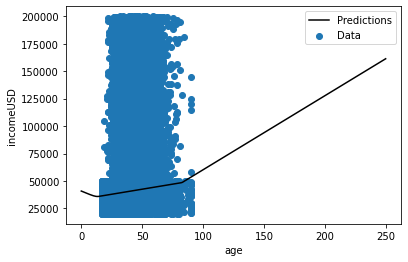

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_age_model.predict(x)

plot_age(x, y)

Wow! Our model does a much better job! But is it a good job? Not yet.

And we collect the test results:

In [ ]:
test_results['dnn_age_model'] = dnn_age_model.evaluate(
    test_features['age'], test_labels,
    verbose=0)

204/204 [==============================] - 0s 1ms/step - loss: 25983.5508


### **3.3.2 REGRESSION: Multiple Variables**
If you repeat this process using all the inputs it slightly improves the performance on the validation dataset.

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 8)                 17        
_________________________________________________________________
dense_5 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 4,818
Trainable params: 4,801
Non-trainable params: 17
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=1, epochs=10)

Epoch 1/10
652/652 [==============================] - 2s 2ms/step - loss: 54939.7500 - val_loss: 47505.6797
Epoch 2/10
652/652 [==============================] - 1s 2ms/step - loss: 34260.3477 - val_loss: 25462.8477
Epoch 3/10
652/652 [==============================] - 1s 2ms/step - loss: 26236.3086 - val_loss: 24974.4590
Epoch 4/10
652/652 [==============================] - 1s 2ms/step - loss: 26069.2285 - val_loss: 24924.1895
Epoch 5/10
652/652 [==============================] - 1s 2ms/step - loss: 26024.1738 - val_loss: 24894.6934
Epoch 6/10
652/652 [==============================] - 1s 2ms/step - loss: 25989.9375 - val_loss: 24871.0254
Epoch 7/10
652/652 [==============================] - 1s 2ms/step - loss: 25959.6523 - val_loss: 24847.9902
Epoch 8/10
652/652 [==============================] - 1s 2ms/step - loss: 25933.2188 - val_loss: 24834.1289
Epoch 9/10
652/652 [==============================] - 1s 2ms/step - loss: 25911.3242 - val_loss: 24820.7129
Epoch 10/10
652/652 [=======

Let's see if our predictions come closer to the actual data distribution (run the code below to see the graph):

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [incomeUSD]')
plt.ylabel('Predictions [incomeUSD]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Now we can predict our test values

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

As before, we collect the results on the test set in our test_results variable:

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

# **4. Comparing all 4 models**
Now that all the models are trained check the test-set performance and see how they did:

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [incomeUSD]']).T

,Mean absolute error [incomeUSD]
age_model,48830.074219
linear_model,55356.195312
dnn_age_model,25983.550781
dnn_model,25139.277344


## Your Turn

Which model performs the best? If you think about how each of the 4 models was built, why does your chosen model perform best?

#SOLUTIONS
To help you get unstuck:

In [ ]:
# This is the solution for task 2.1 above

adult_dl = pd.DataFrame(adult, columns = ['age', 'educationyears', 'race','hoursperweek','incomeUSD'])
adult_dl.head()

,age,educationyears,race,hoursperweek,incomeUSD
0,39,13,White,40,43747
1,50,13,White,13,38907
2,38,9,White,40,25055
3,53,7,Black,40,26733
4,28,13,Black,40,23429


In [ ]:
adult_dl.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)